In [417]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [418]:
df = pd.read_csv('ford.csv')
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145,57.7,1.2


# Data Exploration

In [419]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [420]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

In [421]:
for i in numerical_columns:
    if i == 'year' or i== 'engineSize':
        p=sorted(df[i].unique())
        print(i,df[i].nunique(),p)
        continue
    print(i,df[i].nunique())

year 23 [1996, 1998, 2000, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2060]
price 3511
mileage 13528
tax 36
mpg 90
engineSize 16 [0.0, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 2.0, 2.2, 2.3, 2.5, 3.2, 5.0]


In [422]:
df['fuelType'].value_counts()

Petrol      12179
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

In [423]:
df['engineSize'].value_counts()

1.0    7765
1.5    3418
2.0    3311
1.2    1626
1.6     923
1.1     559
1.4     112
2.3      80
0.0      51
5.0      45
1.8      35
2.2      13
2.5      13
1.3      13
3.2       1
1.7       1
Name: engineSize, dtype: int64

In [424]:
df['year'].value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
2060       1
Name: year, dtype: int64

# Data cleaning

In [425]:
df.duplicated().sum()

154

In [426]:
df=df.drop_duplicates()

In [427]:
df = df[df['year'] <= 2020]
df = df[df['engineSize'] > 0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17760 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17760 non-null  object 
 1   year          17760 non-null  int64  
 2   price         17760 non-null  int64  
 3   transmission  17760 non-null  object 
 4   mileage       17760 non-null  int64  
 5   fuelType      17760 non-null  object 
 6   tax           17760 non-null  int64  
 7   mpg           17760 non-null  float64
 8   engineSize    17760 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.4+ MB


In [428]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [429]:
outlier_threshold = 4.5

mean_price = df['price'].mean()
std_price = df['price'].std()
df = df[abs(df['price'] - mean_price) <= outlier_threshold * std_price]

mean_mileage = df['mileage'].mean()
std_mileage = df['mileage'].std()
df = df[abs(df['mileage'] - mean_mileage) <= outlier_threshold * std_mileage]

df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000
mean,2016.878776,12246.634684,22990.925985,113.182601,57.987186,1.347237
std,1.979201,4546.243973,18239.028323,61.910170,10.033753,0.406428
min,1996.000000,675.000000,1.000000,0.000000,20.800000,1.000000
25%,2016.000000,9000.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18240.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,30970.000000,145.000000,65.700000,1.500000
max,2020.000000,33591.000000,110000.000000,580.000000,201.800000,5.000000


# Data visualization

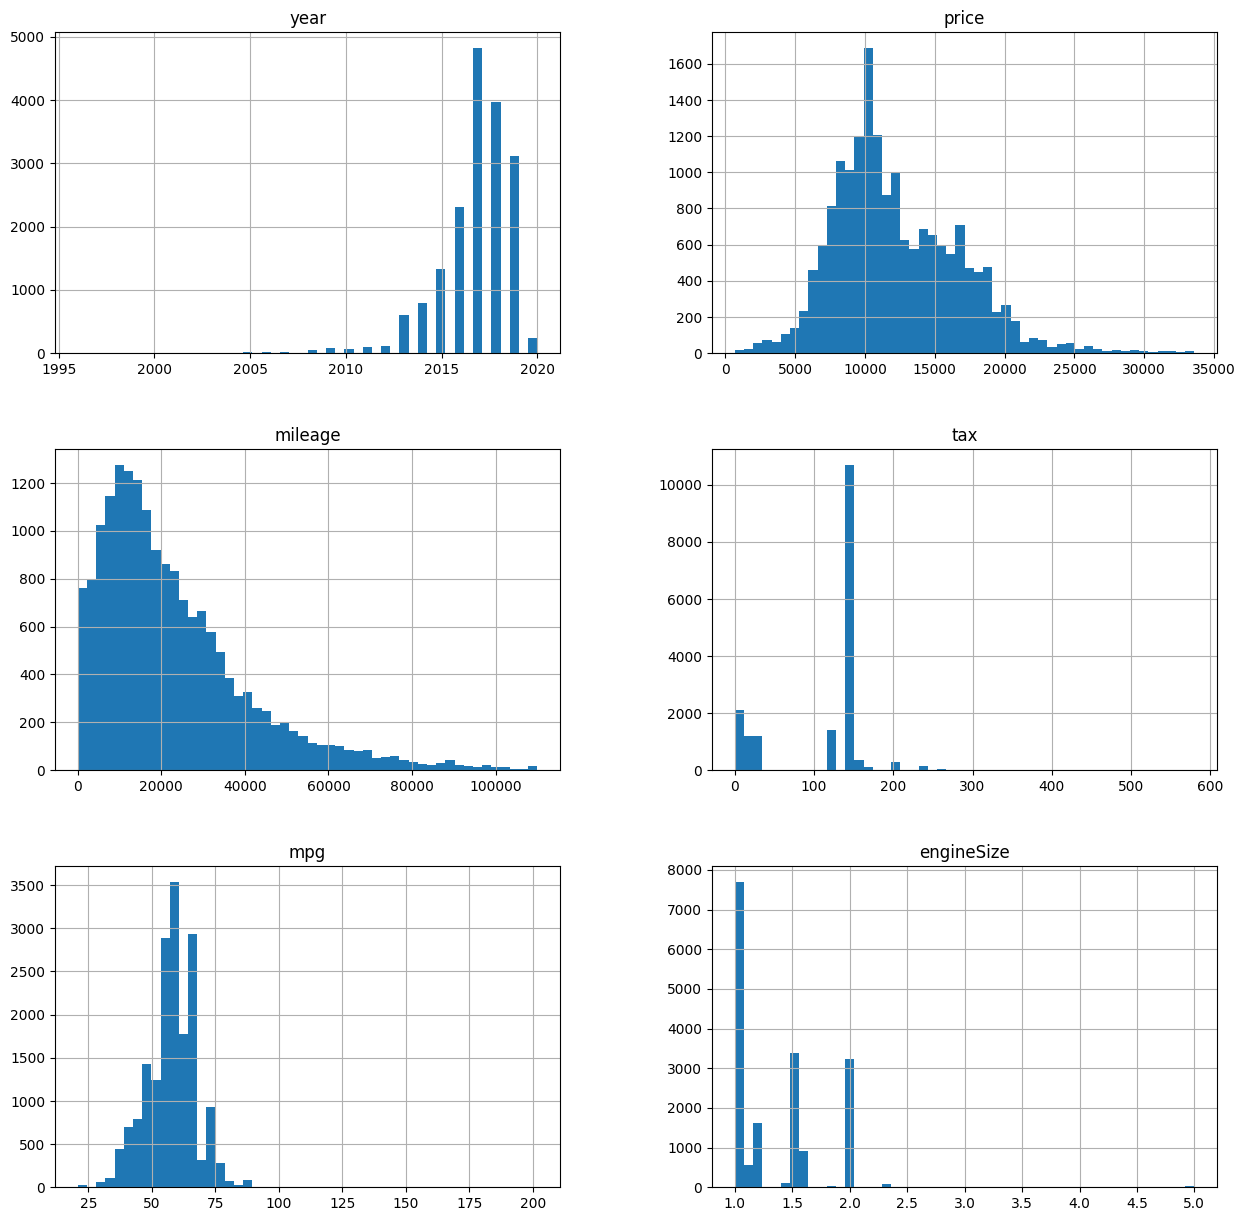

In [430]:
df.hist(figsize=(15,15), bins=50)
plt.show()

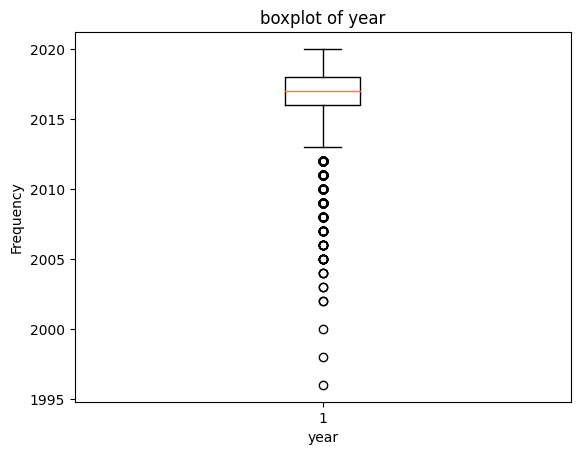

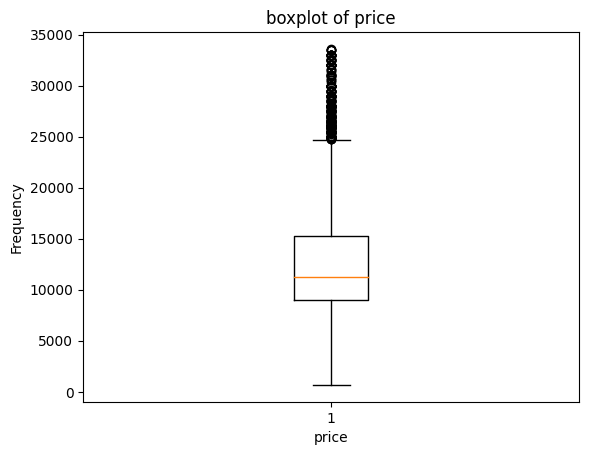

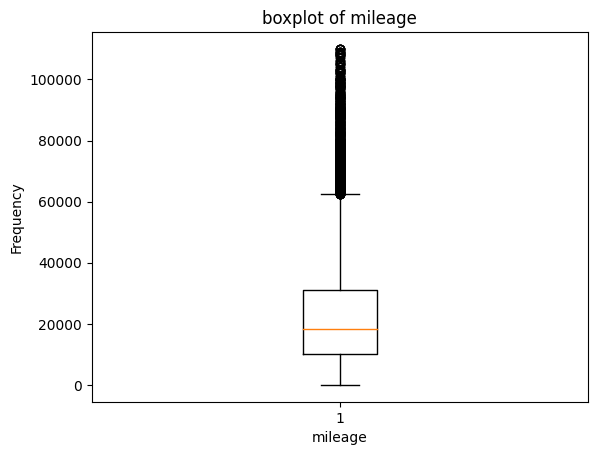

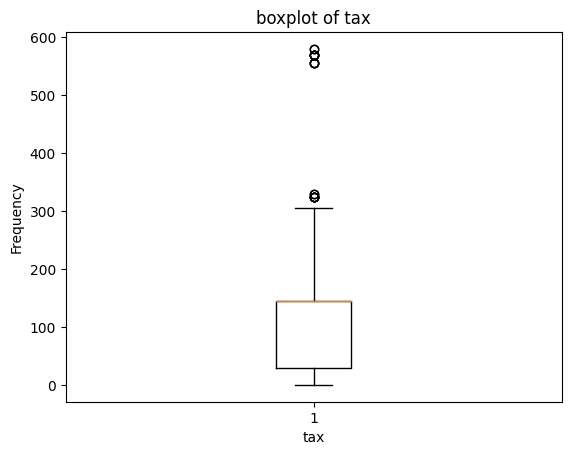

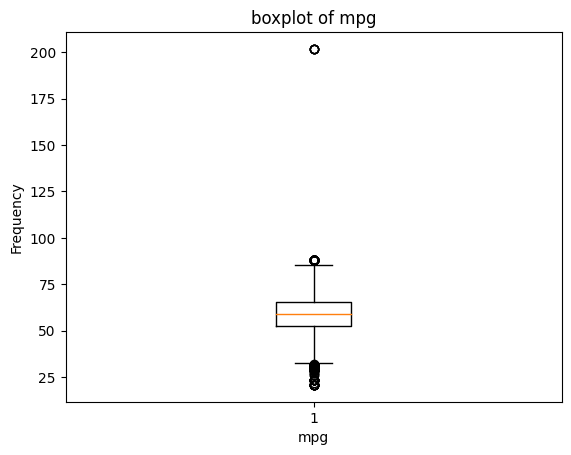

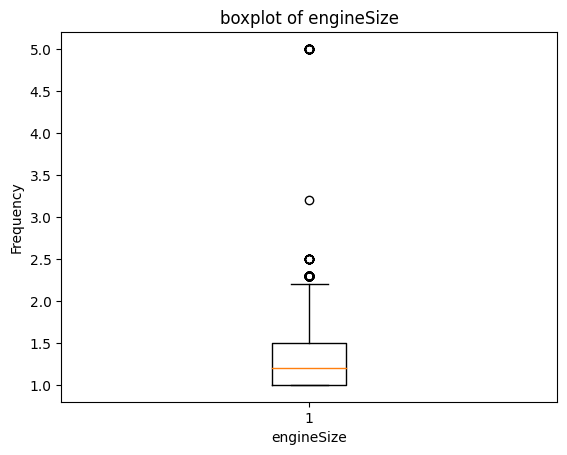

In [431]:
for i in numerical_columns:
  plt.boxplot(df[i])

  # Adding labels and title
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f'boxplot of {i}')

  # Display the histogram
  plt.show()

In [432]:
df.corr()

<ipython-input-432-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.654034,-0.715607,0.319204,-0.024402,-0.152398
price,0.654034,1.000000,-0.536728,0.423888,-0.332888,0.386365
mileage,-0.715607,-0.536728,1.000000,-0.281631,0.127257,0.229545
tax,0.319204,0.423888,-0.281631,1.000000,-0.501456,0.189849
mpg,-0.024402,-0.332888,0.127257,-0.501456,1.000000,-0.239850
engineSize,-0.152398,0.386365,0.229545,0.189849,-0.239850,1.000000


<ipython-input-433-d53aaec035f6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

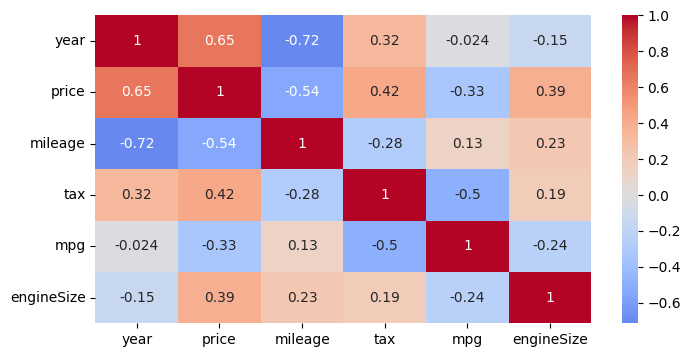

In [433]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

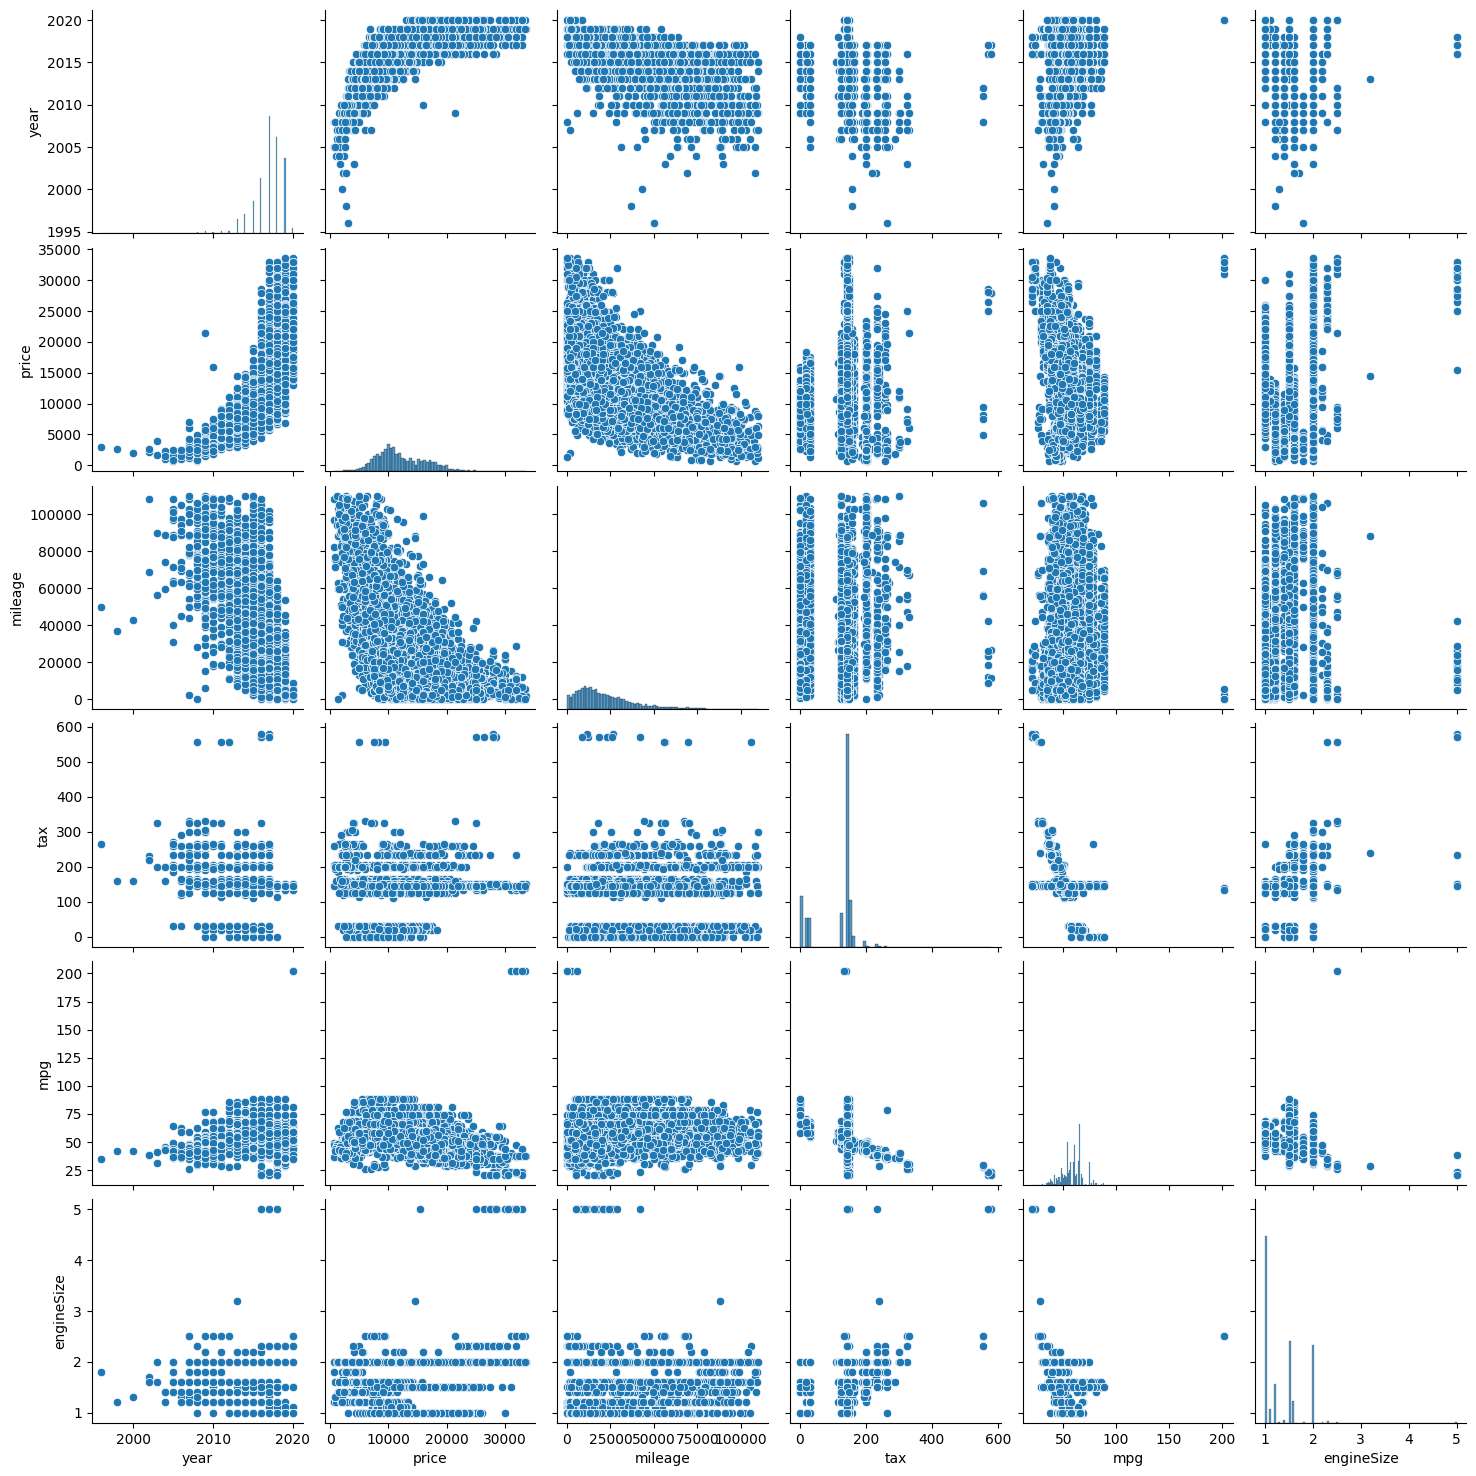

In [434]:
sns.pairplot(df)
plt.show()

# Insights

1-Data Distributions:
- The data exhibits non-normal distributions, particularly with the right-skewed distribution of mileage.

2-Outliers Detection:
- Outliers are present in the dataset, notably in variables like mileage and tax.

3-Variable Relationships:

- There is a positive correlation (0.65) between the production year (year) and the price (price), indicating that newer cars tend to have higher prices.

- Conversely, there is a negative correlation (-0.53) between mileage (mileage) and price (price), suggesting that higher mileage generally results in lower prices.
- Tax (tax) and fuel efficiency (MPG) exhibit a negative correlation (-0.50), implying that cars with lower tax rates tend to have higher fuel efficiency.

4-Price Distribution:
- The distribution of car prices is wide-ranging, reflecting significant price variations across the dataset.

5-Temporal Trends:
- Prices have shown an increasing trend over time, as indicated by the positive correlation with the production year.

# TrainTheData

## ONE HOT ENCODING (dummies)

In [435]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000
mean,2016.878776,12246.634684,22990.925985,113.182601,57.987186,1.347237
std,1.979201,4546.243973,18239.028323,61.910170,10.033753,0.406428
min,1996.000000,675.000000,1.000000,0.000000,20.800000,1.000000
25%,2016.000000,9000.000000,10000.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18240.000000,145.000000,58.900000,1.200000
75%,2018.000000,15295.000000,30970.000000,145.000000,65.700000,1.500000
max,2020.000000,33591.000000,110000.000000,580.000000,201.800000,5.000000


In [436]:
df_ = pd.get_dummies(df, columns=categorical_columns)
df_.describe()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
count,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.00000,17645.000000,17645.000000,...,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000,17645.000000
mean,2016.878776,12246.634684,22990.925985,113.182601,57.987186,1.347237,0.019836,0.03066,0.063417,0.011391,...,0.000057,0.000057,0.075205,0.864551,0.060244,0.319297,0.000113,0.001190,0.000057,0.679343
std,1.979201,4546.243973,18239.028323,61.910170,10.033753,0.406428,0.139439,0.17240,0.243719,0.106124,...,0.007528,0.007528,0.263730,0.342212,0.237945,0.466218,0.010646,0.034479,0.007528,0.466743
min,1996.000000,675.000000,1.000000,0.000000,20.800000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,9000.000000,10000.000000,30.000000,52.300000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,11291.000000,18240.000000,145.000000,58.900000,1.200000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2018.000000,15295.000000,30970.000000,145.000000,65.700000,1.500000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2020.000000,33591.000000,110000.000000,580.000000,201.800000,5.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [437]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [438]:
X = df_.drop('price', axis=1)
y = df_['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [439]:
X_train.describe()

,year,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,...,model_ Transit Tourneo,model_Focus,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
count,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,...,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000,14116.000000
mean,2016.867455,23084.517923,113.095565,57.951204,1.346316,0.019198,0.030249,0.064395,0.011264,0.000071,...,0.000071,0.000071,0.075163,0.863701,0.061136,0.318291,0.000071,0.000921,0.000071,0.680646
std,1.989113,18257.783869,61.882015,9.874383,0.404638,0.137226,0.171279,0.245464,0.105535,0.008417,...,0.008417,0.008417,0.263663,0.343118,0.239589,0.465830,0.008417,0.030334,0.008417,0.466243
min,1996.000000,1.000000,0.000000,20.800000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,10104.500000,30.000000,52.300000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2017.000000,18350.000000,145.000000,58.900000,1.200000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2018.000000,31107.000000,145.000000,65.700000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,2020.000000,110000.000000,580.000000,201.800000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## MinMax Scaler

In [440]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = X_train.select_dtypes(include=['float64','int']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler only on the numerical columns of the training set
scaler.fit(X_train[numerical_cols])

# Transform only those columns for both the training and test sets
X_train_mm_scaled = X_train.copy()
X_test_mm_scaled = X_test.copy()
X_train_mm_scaled[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test_mm_scaled[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [441]:
X_train_mm_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14116 entries, 8776 to 16025
Data columns (total 37 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          14116 non-null  float64
 1   mileage                       14116 non-null  float64
 2   tax                           14116 non-null  float64
 3   mpg                           14116 non-null  float64
 4   engineSize                    14116 non-null  float64
 5   model_ B-MAX                  14116 non-null  uint8  
 6   model_ C-MAX                  14116 non-null  uint8  
 7   model_ EcoSport               14116 non-null  uint8  
 8   model_ Edge                   14116 non-null  uint8  
 9   model_ Escort                 14116 non-null  uint8  
 10  model_ Fiesta                 14116 non-null  uint8  
 11  model_ Focus                  14116 non-null  uint8  
 12  model_ Fusion                 14116 non-null  uint8  
 13

## DT

In [442]:
from sklearn.tree import DecisionTreeRegressor

dtr_model = DecisionTreeRegressor()

dtr_model.fit(X_train_mm_scaled, y_train)

# Make predictions
y_pred = dtr_model.predict(X_test_mm_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("For MinMax Scaler Data:")
print(f" Mean Absolute Error: {mae}")
print(f" Mean Squared Error: {mse}")
print(f" Root Mean Squared Error: {rmse}")
print(f" R-squared: {r2}")

For MinMax Scaler Data:
 Mean Absolute Error: 1074.614007745348
 Mean Squared Error: 2363198.3594109127
 Root Mean Squared Error: 1537.269774441335
 R-squared: 0.8895929349953865
